# Take Home Test from Casper
Name: Elaine

In [138]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
data = pd.read_excel("XLS_takehome.xlsx")

# Build datetime type
data["dateordered"] = pd.to_datetime(data.dateordered)
data["datereturned"] = pd.to_datetime(data.datereturned)

# Sanity Check

In [182]:
data.head()

,dateordered,datereturned,orderstatus,orders
0,2016-12-31,2017-01-24,returned,1
1,2016-12-31,NaT,complete,8
2,2016-12-30,NaT,complete,14
3,2016-12-29,NaT,complete,14
4,2016-12-28,2016-12-29,returned,1


In [184]:
print ("Is there any duplicates?")
print (data.count == data.drop_duplicates().count()[0])

Is there any duplicates?
False


In [185]:
data[data.dateordered == '2016-08-09']

,dateordered,datereturned,orderstatus,orders
198,2016-08-09,2016-10-27,returned,1
199,2016-08-09,2016-10-29,returned,1
200,2016-08-09,NaT,complete,9


Seems like the dataset has duplicates. If I had chance I would figure out why there are duplicates. Besides, some date has more than 2 records. I would also check that.

Here, I would assume every records is valid and accurate, which represent really orders.

# Exercise 1:

**Crunch the data and tell us whether our return rate is trending up or down. Additional insights are welcome, but not required**

For Exercise 1, I need to define return rate first.

Let's say return rate equals #return oders / (#return orders + #complete orders).   
Before calculating that, I need to check the distribution of return time in order to check the data validation.

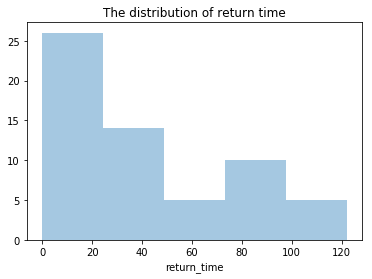

In [192]:
data["return_time"] = data.datereturned - data.dateordered

sns.distplot(data.dropna().return_time.astype("int")/86400000000000, kde=False).set_title("The distribution of return time")
plt.show()

In [193]:
print ("The return time is not more %s Days." % data.dropna().return_time.max())
print ("The average return time is %s Days." % data.dropna().return_time.mean())
print ("The start date of these order is %s." % data.dateordered.min())
print ("The end date of these order is %s." % data.dateordered.max())

The return time is not more 122 days 00:00:00 Days.
The average return time is 40 days 20:00:00 Days.
The start date of these order is 2016-08-01 00:00:00.
The end date of these order is 2016-12-31 00:00:00.


As the distribution displayed above, the return time costs no more than 122 days, which is almost 4 month. Because the order status changed only when the order is returned. And the data is current as of January 28, 2017. So the data after September 2016 is not reliable. 

However, I can not easy get the trend based on 2 month data, so I decided to consider a mild assumption. Because the average return time is 40 days, we can barely trust the data before January 2017.

In [194]:
value_data = data[data.dateordered <= datetime.datetime(2016,12,21)]
value_data.head()

,dateordered,datereturned,orderstatus,orders,return_time
20,2016-12-21,NaT,complete,8,NaT
21,2016-12-20,2016-12-25,returned,1,5 days
22,2016-12-20,2017-01-08,returned,1,19 days
23,2016-12-20,NaT,complete,13,NaT
24,2016-12-19,NaT,complete,11,NaT


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


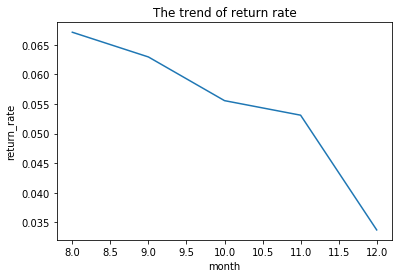

In [195]:
# Create month column
value_data["month"] = value_data.dateordered.apply(lambda x: x.month)
order_count = value_data[["orderstatus", "orders", "month"]].groupby(["month", "orderstatus"]).sum().unstack(level=1).orders

# Calculate return rate
order_count["return_rate"] = order_count.returned / (order_count.returned + order_count.complete)
order_count = order_count.reset_index()

# Plot return rate line chat
sns.lineplot(x="month", y="return_rate", data=order_count ).set_title("The trend of return rate")
plt.show()

From the line chat below, we can see that the 'return rate' went down all the time. However, as I said before, the data after September 2016 is not strongly reliable. Some completed cases could change to return cases. So the return rate of September, November and December could be larger than that on the graph. The variance of return rate in December could be very large.

# Exercise 2: 
**Write the SQL code to produce number of completed orders by date (name of source data table is ‘casper_orders’)**


SELECT dateordered, SUM(orders) as orders  
FROM casper_orders  
WHERE orderstatus = "complete"  
GROUP BY 1 ；
